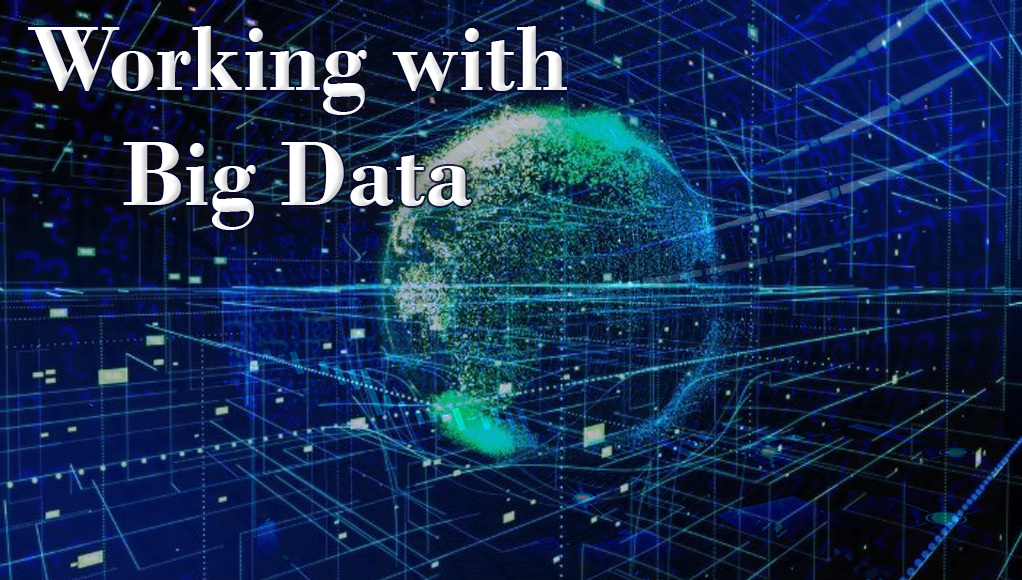

# **<font size="36">Part 3 - Working with Big Data</font>**  
  
We have barely scratched the surface of Pandas and data exploration and analysis.
  
In fact we have already pretty much skipped over a section on conditional functions which are vitally important to intermedate to advanced data work flows.
  
However lets move on and quickly talk about how to work with Big Data.
  
Before we begin we need to define Big Data!  

<span style="background:cyan">&emsp;<b>QUESTION:</b> What is big data?</span>

For todays purposes we will define Big data that can not fit into computer memory (RAM).  
Less can come into a either, or a combination of;
- A single very large file, larger then your RAM.
- Many files that can not fit into memory all at once.
  
Pandas has a limitation not only of dealing with files larger then you have RAM available for.  
For instance I have a workstation with 128GB of RAM.  
You would like to assume I could use Pandas on a csv file that is upwards of 128GB's.  
Reality is Pandas will start bogging down at around 1 million rows of data.  
Larger then that and well it just stops working.

<span style="background:cyan">&emsp;<b>QUESTION:</b> So how can we work with Big data?</span>  

The first thing we will look at is smaller 'big' data.  
For most of you, you can simply move away from simple file formats like Excels .xls or the .csv's we have been using.  
We have already seen an instance when using the textual based .csv format caused us woes.  
  
So what is the alternative?  

## **Use Parquet instead of CSV For larger Data!**  
  
Both Excel and csv files are extremly common data file formats people work with.  
However if your data is much larger in size, roughly speaking >50 MB's deffinently >100MB's you should concider saving your data out as a Parquet file.  
  
<b>Why Parquet?</b>  
Excel and csv formats are more row performant based while parquet is columnar performant. No need to try and understand this other then noting the most important issue - 
Parquet builds smaller files and thus works with them faster!  
Also Parquet would help use get around the textual based artifacts we ran into when working with the country data.  
  
<b>Working with Parquet:</b> To work with Parquet you need to install either the <b>fastparquet</b> or <b>pyarrow</b> package.  
Once you have one of the above packages installed you do NOT need to actually import it. If its there Pandas will import it in the background for you!  
  
To use Parquet you can simply replace the csv functions with parquet as well as the file extensions;
- <b><i>Reading files</i></b> from <code><i>DataFrame</i>.to_csv("<i>filename.csv</i>")</code> ==> <code><i>DataFrame</i>.to_parquet("<i>filename.parquet</i>")</code>
- <b><i>Writing files</i></b> from <code><i>DataFrame</i>.read_csv("<i>filename.csv</i>")</code> ==> <code><i>DataFrame</i>.read_parquet("<i>filename.parquet</i>")</code>
  
  
Now for the real fun. While just saving to a parquet file format you can see a healthy file size reduction (usually >40% smaller).  
  
But you can go one step further and have Pandas compress your Parquet file by zipping it up into a <b>.gzip</b> file.   
Another advantage to using <b>.gzip</b> is if you need to share your files with collaborators the much smaller sizes make uploading and downloading them much faster as well.  
  
The only additional thing you need to deal with is telling the <b>to_parquet()</b> the compression method you desire and the appropriate file extension.  
  
For example;  
```python
DataFrame.to_parquet("filename.gzip", compression='gzip')
```



### **A Quick Snapshot Example**  
  
Just for the purposes of an example of converting a file from csv to parquet this is all you really need to do.  

```python
fName = os.path.join('Data', 'My_cool_but_large_data.csv')
df = pd.read_csv(fName)

#
# Do all your processing you desire
#

# Save the DataFrame as a Parquet file
fName = os.path.join('Data', 'My_processed_data.parquet')
df.to_parquet(fName)

# Alternativly as a gzipped file
fName = os.path.join('Data', 'My_processed_data.gzip')
df.to_parquet(fName, compression='gzip')
```

### **A Real Example**  
  
First you will need to install a Parquet package.  
Pandas seems to like fastparquet best so we can install that by uncommenting out the following line and running it.

In [ ]:
#!pip install fastparquet

Load the packages as you always need to.

In [ ]:
import os
import pandas as pd
import numpy as np

<b>NOTE:</b> You will not need to import Parquet. Pandas will deal with it on its own!

# **REMOVE THE '..'**

<span style="background:cyan">&emsp;<b>You Try it:</b> Load our 'Combined_lists.csv' file as we have been.  
Then save it back out as a 'Test.parquet' file
Then save it back out as a 'Test.gzip' file</span>

<div class="alert alert-block alert-warning">  
<p>Solution:</p>  
</div>

In [ ]:
# Load the .csv into a DataFrame
df = pd.read_csv(os.path.join('Processed_data', 'Combined_lists.csv'))

# Save the DataFrame as a parquet file
df.to_parquet(os.path.join('Processed_data', 'Test.parquet'))

# Save the DataFrame as a parquet.gzip file
df.to_parquet(os.path.join('Processed_data', 'Test.gzip'), compression='gzip')


Lets look at the improvement in switching away from .csv.  
Note: This does not translate to a direct speed reduction but it will speed things up.  

In [ ]:
def improvement(s1, s2):
    return np.round((s1-s2)/s1 *100, 1)

csv = 47971
par = 25141
gzp = 15778
print('Size reductions')
print(f'csv to parquet:  {improvement(csv, par)}% reduction')
print(f'parquet to gzip: {improvement(par, gzp)}% reduction')
print(f'csv to gzip:     {improvement(csv, gzp)}% reduction')

## **Beyond Pandas - XArray, Dask, Vaex, cuDF**  
  
I needed to mention that when your data turns into large data (say with millions of rows and/or columns) then Pandas becomes a questionable choice for your data needs.  
Likewise for scientific data you may be using special file formats such as netCDF, HDF4, HDF5 or others.   
  
In both of these cases you should look into <b>XArray</b> and/or <b>Dask</b>.  
These packages are built to look and feel pretty much just like Pandas and includes many of the same functions and operations.  
Often not much of your Pandas codes needs changed at all.

The added advantage of working with Dask as part of your data pipeline is that it provides 3 MASSIVE advantages especially when used in conjunction with XArray.  
- Works with file formats not properly accessible with Pandas!
- Works seemlessly, quickly and with no additional code with data to large to fit in available RAM!
- It works in parallel with all cores you have available not just one!  
  
The real power here lies in the ability to combine both XArray and Dask, heck sometimes even Pandas functionality together in your workflow. 

Yet these are not the only Pandas like packages out there. There are many and many others being developed all the time.  
The one thing they have in common is that, as much as possible, are designed to mimick the look and feel of working with Pandas.  
  
The advantages to the newer ones? They all try to work faster and against larger data!  
     
These packages well worth a good look at are if you really need more umph from your data workflow pipeline.  
Clikcing on the below links will take you to thier respective home pages:
- **<a href="https://xarray.pydata.org/en/stable/">XArray</a>**
- **<a href="https://docs.dask.org/en/latest/">Dask</a>**
- **<a href="https://vaex.io/docs/index.html">Vaex</a>**
- **<a href="https://docs.rapids.ai/api/cudf/stable/">cuDF</a>**  - (part of the NVidia Rapids framework for GPU base workflows) 

### **A Quick Snapshot Example**  
  
As a quick example, below is a snapshot of some code used to create data for a DaVinci Resolve workshop I host.  
A bunch of MODIS files where downloaded from an LDAAC server as HDF4 files.  
  
To process all these files to just what was needed for a seriers of animations I;
 - Cycled through all my data files in my data directory using the <b>glob</b> package
 - For each file I opened them with <b>XArray</b> in conjunction with <b>rioxarray</b> as the rasterio engine
 - I dropped all the variables and dimensions I did not need
 - I added new metadata for each file
 - I converted temperature data from degress kelvin to celsius
 - Then saved it all out with a more appropriate filename for my needs using the netCDF file format
  
Total runtime using this method across all these files took only an hour.  
Total runtime if I tried this with Pandas? Just a few fractions of seconds before it complained it could not do almost any of this!
  
<b>Why go through all of this?</b>  
The original raw data files totaled 179.3 GB's (puny compared to other data I processed for the DaVinci and other workshops but still!!!)
Getting the data to a useable format and only what I needed totaled to only 50.8 GB's!

For geosciences and astorphysics its fairly common to have hundreds or thousands of files with each file being >35 GB's so processing >>TB of data quickly (enough) is extremely important and Dask, XArray and the other tools mentioned all make that happen!
  


```python
import numpy as np
import xarray as xr
import rioxarray as rxr
import os
from glob import glob


def process_modis_data(fName):
    # Open each file as an XArray Dataset using the rioxarray rasterio as the background engine
    modis = xr.open_dataset(fName, engine='rasterio')

    # Drop everything except the land Surface Temperature (LST)
    modis = modis.drop(['Clear_sky_nights', 'Percent_land_in_grid', 'QC_Day', 'Day_view_time', 'Day_view_angl', 'Clear_sky_days', 'LST_Night_CMG', 'QC_Night', 'Night_view_time', 'Night_view_angl'])
    modis = modis.drop(['Emis_20', 'Emis_22', 'Emis_23', 'Emis_29', 'Emis_31', 'Emis_32', 'spatial_ref'])

    # Update the attributes for the file with reprocessing info
    modis.attrs['UNITS'] = 'celsius'
    modis.attrs['REPROCESSING_AUTHOR']='Tim Dunn'
    modis.attrs['REPROCESSING_DATE']='Jan 2022'
    modis.attrs['REPROCESSING_OUTPUT_FORMAT']='netCDF'
    modis.attrs['REPROCESSING_NOTES']='Restricted DataSet to LST_Day_CMG and converted from kelvin to celsius for the sole purpose of CU CRDDS tutorial workshops'

    # Convert degrees kelvin to celsius
    a = modis.to_dataframe()                        # To make this easier for people to understand convert from a XArray DataSet to a DataFrame
    a['LST_Day_CMG'] = a['LST_Day_CMG']-273.15      # COnvert from degrees kelvin to celsius
    b = xr.Dataset.from_dataframe(a)                # To save as a netCDF, the way I need it, convert back from the XArray DataFrame to a XArrays DataSet
    
    # Build output path & name
    start = modis.attrs['RANGEBEGINNINGDATE'][:7]   # Extract the year and month for use as part of the file name 
    outpath = 'Processed_Data'                      # Output file directory
    fName = fName[9:]                               # Extract the base input file name as the base for the output file name
    name = f'{fName[:7]}_{fName[8:16]}_{start}.nc'  # Build the full output file name
    outname = os.path.join(outpath, name)           # Join the path and file name

    # Save the DataSet to a netCDF file
    b.to_netcdf(outname)                      
    
    print(outname)                                  # print the completed file path+name as a progress indicator since this will take about an hour to run through all the files.
    
    
inpath = os.path.join('Raw_Data', '*.hdf')

for f in glob(inpath):
    process_modis_data(f)    
```

For those wiser then needed for this workshop yes there is an even better way of working with a series of files using XArray with XArrays ability to work with files in a <i>batch</i> like mode.  
But the even better juju happens when you are doing alot more processing per file and mix in Dask into the pipeline.  
Alas these tricks are for an entire different, more advanced workshop.  

### **Practical Example**  
  
Install missing required packages just uncomment the desired lines below and run the cell.  
Once installed we can import the packages.

In [ ]:
#!pip install netCDF4
#!pip install dask
#!pip install xarray

In [ ]:
import glob
import netCDF4
import dask.array as da
import dask.dataframe as dd
import xarray as xr


Now we can open the NetCDF file as and XArray dataset.  
Ignore all the warnings they won't affect us at all.

In [ ]:
ds = xr.open_dataset(os.path.join('netCDF_files', '20190801_0000.nc'))


The cool thing about XArray is it provides a cool way of viewing the dataset.  
By displaying the data you can click on the non-grayed out sections to drilldown into the actual data!  
One of the great things about HDF5 and NetCDF, which has HDF5 as its core, is all the Metadata you can get with the files!

In [ ]:
ds

Now lets load the data into a DataFrame.

In [ ]:
df = ds.to_dataframe()

I did warn you Pandas does not like large files!!!  
Thats OK for our purpoases we can work around this limitation if relative ease using Dask which allows out of memory (lazy) compute!  
  
Below is a real world example I created a few years back for friends in ATOC.  
Basically it takes all the netCDF files (I provide only a few of the hundreds we ran) and
- Opens all the netCDF files one by one
- Extracts out the data of interest
- Uses a lazy compute to create a Dask DataFrame with all the data from each file!
- Does some data cleaning/munging, ect (not shown here)
- Converts the Dask DataFrame to an XArray dataset
- Saves it all back out to as a single new netCDF file

# MOVE DATA INTO netCDF FOLDER and read/write it to their!!!

In [ ]:
#Declare variable arrays for each netCDF variable you want to extract and then add to the new netCDF file
lat          = []
lon          = []
stationName  = []
stationID    = []
temp         = []

#Iterate through each netCDF file
for f in glob.glob(os.path.join('netCDF_files', '*.nc')):
    #Open each file with netCDF because xarray wiil not play nice, if at all with this kind of data (it's a non-equal/infinite dimensions issue well known to the xarray devs but no solution coming anytime soon.)
    nc = netCDF4.Dataset(f)

    #Extract the variables desired and save them to a Dask array
    lat         = da.from_array(nc['latitude'])
    lon         = da.from_array(nc['longitude'])
    stationName = da.from_array(netCDF4.chartostring(nc['stationName'][:]))
    stationId   = da.from_array(netCDF4.chartostring(nc['stationId'][:]))
    temperature = da.from_array(nc['temperature'])

    #Concat the arrays to a dask dataframe
    ddf = dd.concat([dd.from_dask_array(c) for c in [lat, lon, stationName, stationId, temperature]], axis = 1)
    
# Now convert to a pandas dataframe since there currently is no way to send it directly to a xarray dataset.
# There are several tickets opened requesting this for both xarray and dask but the dev's are stumped on a direct way to implement 
# this due to a 'several dimensions' issues.
ddf = ddf.compute()

######################################################################################################################
# At this point do any/all other data processing you desire as everything 'should' fit in RAM just fine
######################################################################################################################
#Do stuff

#Add the column header names to the dataframe
ddf.columns = ['latitude', 'longitude', 'stationName', 'stationId', 'temperature']

#Convert the pandas dataframe to a xarray dataset
pdf = ddf.to_xarray()

#Save the xarray dataset to a new netCDF file
#NOTES: This is NOT a CF compliant netCDF as it has no attributes, but you can easily add them
#       This also does not move the metadata over but you can just as easily add it in as well
pdf.to_netcdf(os.path.join('netCDF_files', 'demo_netcdf.nc'), 'w')

And now we can look at the final netCDF file information pretty much like you would with ncpdump.

In [ ]:
nc = netCDF4.Dataset(os.path.join('netCDF_files','demo_netcdf.nc'))

In [ ]:
nc

In [ ]:
nc.dimensions

In [ ]:
nc.variables

# **Where to go from here?**  
  
First of all take a breathe and most probably some asprin for the headache - that was A LOT of material.  
Now you understand the verbosity of these Notebooks so you can come back leter and investigate parts that may be of interest to you.  
  
But we have not even begun to scratch the surface.  
In a few weeks I'll be teaching a 'Data Science with Python' series which will cover so much more then just this and with different data.  
If interested stay tuned to Kims' weekly CRDDS Newsletters for more information.  